# Project 2: Classification with Kernelized Perceptron

## Goal: use perceptron to deal with a 2-D classification problem

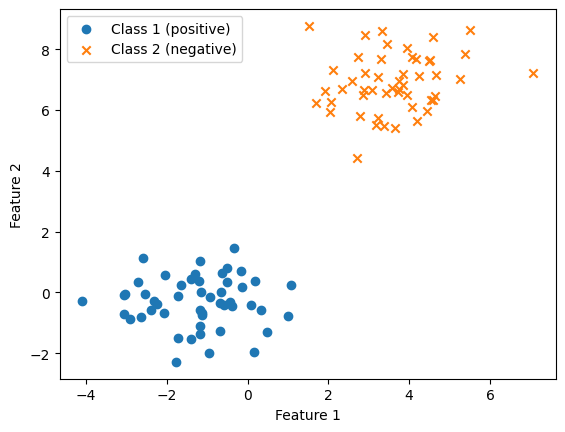

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sklearn.metrics import accuracy_score
# fix random seed for reproducibility
np.random.seed(40)

# Step 1: Define dataset parameters
num_samples = 100
dimensionality = 2
num_classes = 2

# Step 2: Generate random data points for each class
mean_class1 = np.random.randn(dimensionality) * 2
mean_class2 = np.random.randn(dimensionality) * 2 + 5
data_class1 = mean_class1 + np.random.randn(num_samples // 2, dimensionality)
data_class2 = mean_class2 + np.random.randn(num_samples // 2, dimensionality)

# Step 3: Assign class labels (-1 for class 1 and 1 for class 2)
labels_class1 = -np.ones(num_samples // 2)
labels_class2 = np.ones(num_samples // 2)

# Step 4: Combine data and labels, and shuffle the dataset
data = np.vstack((data_class1, data_class2))
labels = np.hstack((labels_class1, labels_class2))
permutation = np.random.permutation(num_samples)
data = data[permutation]
labels = labels[permutation]

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(split_ratio * num_samples)
Xtr, Xtest = data[:split_index], data[split_index:]
Ytr, Ytest  = labels[:split_index], labels[split_index:]

# Visualize the dataset (optional)
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (positive)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (negative)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Perceptron

In [ ]:
class Perceptron(object):

    def __init__(self, T=1):
        self.T = T # number of iterations

    def fit(self, X, y):
        """
        Train perceptron model on data X with labels y and iteration T.
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0.0

        for i in range(self.T):
            for j in range(X.shape[0]):
              if (y[j]*(self.w@X[j] + self.b) <= 0):
                self.w = self.w + y[j]*X[j]
                self.b = self.b + y[j]

    def predict(self, X):
        """
        Predict class labels for samples in X.
        Output should be a 1D array with shape (n_samples,)
        """
        X = np.atleast_2d(X)

        #### YOUR CODE HERE ####
        return np.sign(X@self.w)

In [ ]:
# You should achieve 100% accuracy on the test set

model = Perceptron(T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (np.mean(y_pred == Ytest) * 100))

Accuracy: 100.00%


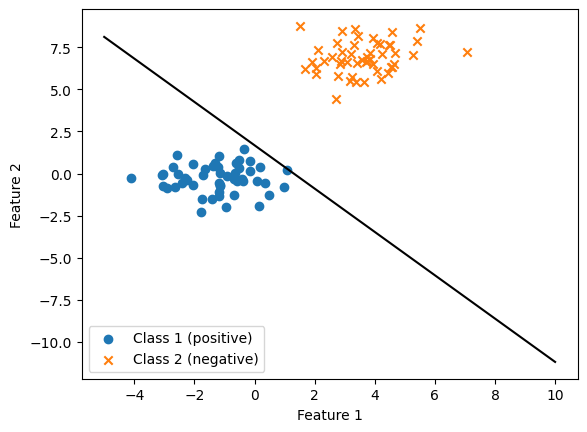

In [ ]:
# Plot the decision boundary
w = model.w
b = model.b
x1 = np.linspace(-5, 10, 100)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2, 'k-')
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (positive)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (negative)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Kernel 

Use kernel method for perceptron

$$
f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

where $k(\mathbf{x}_i, \mathbf{x})$ is the kernel function, $\alpha_i$ are the learned weights, and $y_i$ are the labels.

The kernel (Gram) matrix induced by kernel function *k* over *n* data points is defined as

$$
\mathbf{K}=
\left(\begin{array}{ccc}
k(\mathbf{x}_1,\mathbf{x}_1) & \dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
\vdots & \ddots & \vdots \\
k(\mathbf{x}_n,\mathbf{x}_1) & \dots & k(\mathbf{x}_n,\mathbf{x}_n)
\end{array}\right)
$$

Given a test data point **x**, the predicted label is

$$
\hat{y} = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

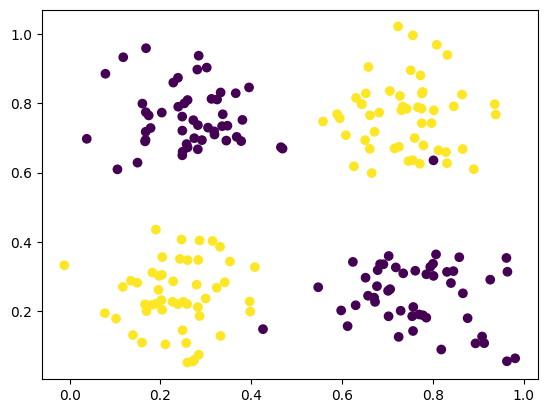

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Fix random seed for reproducibility
np.random.seed(42)

# Number of samples per quadrant
n = 50

# Standard deviation for Gaussian distribution
std_dev = 0.1

# Quadrant 1 and 3: label 1
q1 = np.random.normal(loc=[0.25, 0.25], scale=std_dev, size=(n, 2))
q3 = np.random.normal(loc=[0.75, 0.75], scale=std_dev, size=(n, 2))

# Quadrant 2 and 4: label -1
q2 = np.random.normal(loc=[0.75, 0.25], scale=std_dev, size=(n, 2))
q4 = np.random.normal(loc=[0.25, 0.75], scale=std_dev, size=(n, 2))

X = np.vstack((q1, q3, q2, q4))
y = np.hstack((np.ones(2*n), -np.ones(2*n)))

# Split the data into training and testing sets
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Plot the decision boundary
def plot_decision_bounday_kernel_perceptron(model):
    x1 = np.linspace(0, 1, 50)
    x2 = np.linspace(0, 1, 50)
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = np.zeros(xx1.shape)
    for i in range(xx1.shape[0]):
        for j in range(xx1.shape[1]):
            Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

We use these three types of kernels:


$$
k_{\text{linear}}(\mathbf{x},\mathbf{x}')=\mathbf{x}^\top \mathbf{x}.
$$

$$
k_{\text{poly}}(\mathbf{x},\mathbf{x}')=(1+\mathbf{x}^\top \mathbf{x}')^d.
$$

$$
k_{\text{RBF}}(\mathbf{x},\mathbf{x}') = \exp(-\frac{\lVert \mathbf{x}-\mathbf{x'} \rVert^2_2}{\sigma^2})
$$

In [ ]:
class LinearKernel:
    def __init__(self):
        pass
    def __call__(self, x, y):
        return x.T@y

class PolynomialKernel:
    def __init__(self, p=5):
        self.p = p

    def __call__(self, x, y):
        return ((x.T@y + 1)**self.p)

class GaussianKernel:
    def __init__(self, sigma=10):
        self.sigma = sigma

    def __call__(self, x, y):
        return (np.exp(-np.linalg.norm(x-y) ** 2/(self.sigma) ** 2))

class KernelPerceptron(object):

    def __init__(self, kernel=LinearKernel(), T=1):
        self.kernel = kernel
        self.T = T # number of iterations
        self.alpha = None
        self.Xtra = None
        self.ytra = None

    def fit(self, X, y):
        y = np.squeeze(y)
        self.Xtra, self.ytra = X, y
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        for t in range(self.T):
            for i in range(n_samples):
              if y[i]*(np.sum(K[:,i] * self.alpha * y)) <=0:
                self.alpha[i] += 1.0


    def predict(self, X):
        X = np.atleast_2d(X)
        n_samples, n_features = X.shape
        predictions = np.zeros(n_samples)

        for i in range(n_samples):
          k = np.array([self.kernel(X[i], self.Xtra[j]) for j in range(self.alpha.shape[0])])
          predictions[i] = np.sign(np.sum(self.alpha * self.ytra * k))

        return predictions


Accuracy: 25.00%


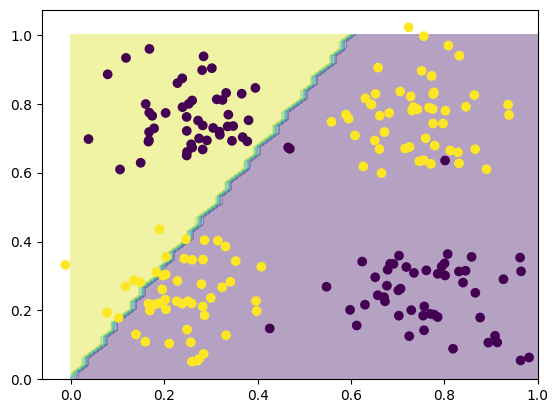

In [ ]:
## results for linear kernel
model = KernelPerceptron(kernel=LinearKernel(), T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(Ytest, y_pred) * 100))
plot_decision_bounday_kernel_perceptron(model)

Since the data is not linearly separable, let's try with the polynomial and gaussian kernels.

Accuracy: 95.00%


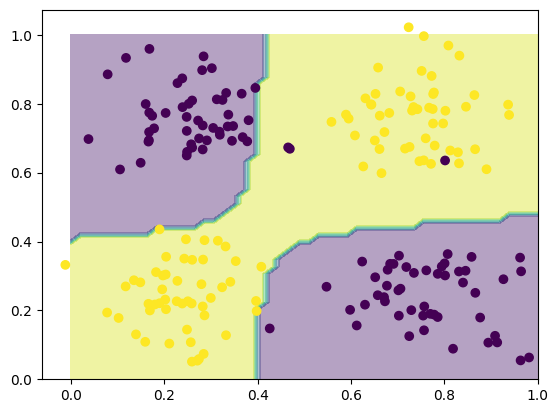

In [ ]:
## results for polynomial_kernel
model = KernelPerceptron(kernel=PolynomialKernel(), T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(Ytest, y_pred) * 100))
plot_decision_bounday_kernel_perceptron(model)


Accuracy: 97.50%


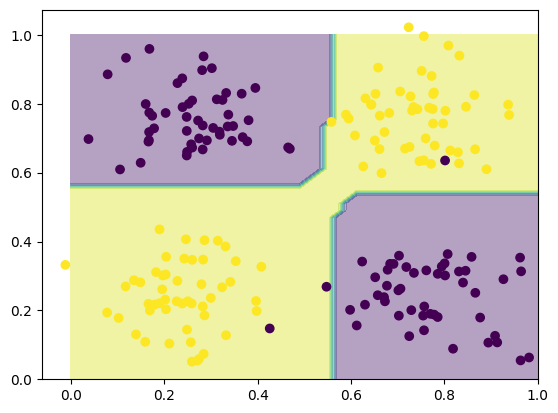

In [ ]:
## results for gaussian_kernel
model = KernelPerceptron(kernel=GaussianKernel(), T=100)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (np.mean(y_pred == Ytest) * 100))
plot_decision_bounday_kernel_perceptron(model)



## Seoul Bike Rental Data

In this dataset on bike rentals in Seoul, there are 6 features related to weather conditions and 1 feature denoting the hour of the day. The response label is the number of rented bikes. Our goal is to redict whether `Rented Bike Count` is greater than 500 from the other features.

In [ ]:
# Unzip the data to the current directory. Change the path accordingly if needed.
# You may use your OS tool or the following code.
# install unzip if needed
!unzip ./pa2_data.zip

Archive:  ./pa2_data.zip
replace __MACOSX/._data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

filename = 'data/SeoulBikeData.csv'
df = pd.read_csv(filename).drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
df = df[(df['Rented Bike Count'] <= 500) | (df['Rented Bike Count'] > 500)]
df = df.sample(n=1000, random_state=4)
X = df.drop(['Rented Bike Count'],  axis=1)[[
                                            'Hour',
                                            'Temperature (deg C)',
                                            'Humidity(%)',
                                            'Visibility (10m)',
                                            'Dew point temperature (deg C)',
                                            'Solar Radiation (MJ/m2)',
                                            'Rainfall(mm)'
                                            ]]
y = df['Rented Bike Count'].values
# binarize y
y = np.where(y <= 500, -1, 1)
y = np.expand_dims(y, 1)

print(f"Shape X {X.shape}")
print(f"Shape y {y.shape}")
print("y distribution: ", np.unique(y, return_counts=True))

X = StandardScaler().fit_transform(X)

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X (1000, 7)
Shape y (1000, 1)
y distribution:  (array([-1,  1]), array([478, 522]))


### Kernel Selection ###

In [ ]:
Xtr, Xval = Xtr[:int(len(Xtr)*0.8)], Xtr[int(len(Xtr)*0.8):]
Ytr, Yval = Ytr[:int(len(Ytr)*0.8)], Ytr[int(len(Ytr)*0.8):]

In [ ]:
# find best p for polynomial kernel

p_values = [1, 2, 3, 4, 5]

best_accuracy = 0
best_p = np.inf

for p_val in p_values:
  model = KernelPerceptron(kernel=PolynomialKernel(p=p_val), T=100)
  model.fit(Xval, Yval)
  y_pred = model.predict(Xtest)
  accuracy = accuracy_score(Ytest, y_pred)
  if accuracy > best_accuracy:
    best_p = p_val
    best_accuracy = accuracy
print("best p: ", best_p)
best_model = KernelPerceptron(kernel=PolynomialKernel(p=best_p), T=10)
best_model.fit(Xtr, Ytr)
y_pred_best = model.predict(Xtest)
true_accuracy = accuracy_score(Ytest, y_pred_best)
print("accuracy with best p: ", true_accuracy)

best p:  4
accuracy with best p:  0.81


In [ ]:
# find best signma for gaussian kernel
s_values = [0.01, 0.1, 1, 10, 100]

best_accuracy = 0
best_p = np.inf

for s in s_values:
  model = KernelPerceptron(kernel=GaussianKernel(sigma=s), T=50)
  model.fit(Xval, Yval)
  y_pred = model.predict(Xtest)
  accuracy = accuracy_score(Ytest, y_pred)
  if accuracy > best_accuracy:
    best_s = s
    best_accuracy = accuracy
print("best sigma: ", best_s)
model = KernelPerceptron(kernel=GaussianKernel(sigma=best_s), T=50)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
accuracy = accuracy_score(Ytest, y_pred)
print("accuracy with best sigma: ", accuracy)

best sigma:  10
accuracy with best sigma:  0.81


In [ ]:
class HyperbolicTangentKernel:
    def __init__(self, a=1, c=0):
        self.a = a
        self.c = c

    def __call__(self, x, y):
        return np.tanh(self.a * (x.T@y.T) + self.c)

In [ ]:
a_values = [0.1, 0.5, 1, 2, 5]
c_values = [-1, -0.5, 0, 0.5, 1]
parameter_combinations = [(a, c) for a in a_values for c in c_values]


best_accuracy = 0
best_combination = (np.inf, np.inf)

for combination in parameter_combinations:
  model = KernelPerceptron(kernel=HyperbolicTangentKernel(a=combination[0], c=combination[1]), T=1)
  model.fit(Xval, Yval)
  y_pred = model.predict(Xtest)
  accuracy = accuracy_score(Ytest, y_pred)
  if accuracy > best_accuracy:
    best_combination = combination
    best_accuracy = accuracy

print("best params: ", best_combination)
model = KernelPerceptron(kernel=HyperbolicTangentKernel(a=best_combination[0], c=best_combination[1]), T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
best_accuracy = accuracy_score(Ytest, y_pred)
print("accuracy with best params: ", best_accuracy)

best params:  (0.1, 0)
accuracy with best params:  0.665


# Feature Selection

Let's improve out accuracy with feature selection.

In [ ]:
from re import S
# Greedy

n_features = Xtr.shape[1]
s = []
V = list(range(n_features))

model = KernelPerceptron(kernel=GaussianKernel(sigma=10), T=50)

best_best_accuracy = 0

for i in range(n_features):
  best_accuracy = 0
  s_i = None

  V_sub = [feature for feature in V if feature not in s]

  for j in V_sub:
    test_features = s + [j]
    X_sub = Xtr[:, test_features]
    Xtest_sub = Xtest[:, test_features]

    model.fit(X_sub, Ytr)

    y_pred = model.predict(Xtest_sub)
    accuracy = accuracy_score(Ytest, y_pred)

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_feature = j

  if best_accuracy < best_best_accuracy:
    break

  best_best_accuracy = best_accuracy

  if best_feature is not None:
    s.append(best_feature)
    V.remove(best_feature)

print(s)
print(best_best_accuracy)

[1, 2, 0, 5]
0.85
